# Machine Learning Non-supervisé

In [2]:
#import et connexion à la DB
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
from sklearn.cluster import *
from configuration.configuration_api import ConfigurationAPI
from rest_client.AuthenticationRest import AuthenticationAPI
from objects_API.BacteriophageJ import BacteriophageJson
from sklearn.decomposition import PCA #Features Exctraction


conf_obj = ConfigurationAPI()
conf_obj.load_data_from_ini()
AuthenticationAPI().createAutenthicationToken();


In [74]:
coordinates = [] #matrix for data representation
phage_designation = [] 

In [76]:

# ==================================================================
# take data from csv file
# ==================================================================

with open('../../statistiques/CSV/phages_in_clear_lysis_couple.csv', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    for row in reader:
        if 'MEAN_AA_M' in row:
            mean_aa_m = row.index('MEAN_AA_M')
        if 'MEAN_AA_E' in row:
            mean_aa_e = row.index('MEAN_AA_E')
        if 'MEAN_AA_N' in row:
            mean_aa_n = row.index('MEAN_AA_N')
        if 'MEAN_AA_Y' in row:
            mean_aa_y = row.index('MEAN_AA_Y')
        if 'MEAN_AA_K' in row:
            mean_aa_k = row.index('MEAN_AA_K')
        if 'MEAN_AA_F' in row:
            mean_aa_f = row.index('MEAN_AA_F')
        if 'MEAN_AA_I' in row:
            mean_aa_i = row.index('MEAN_AA_I')
        if 'MEAN_AA_A' in row:
            mean_aa_a = row.index('MEAN_AA_A')
        if 'MEAN_AA_H' in row:
            mean_aa_h = row.index('MEAN_AA_H')
        if 'MEAN_AA_L' in row:
            mean_aa_l = row.index('MEAN_AA_L')
        if 'MEAN_AA_V' in row:
            mean_aa_v = row.index('MEAN_AA_V')
        if 'MEAN_AA_Q' in row:
            mean_aa_q = row.index('MEAN_AA_Q')
        if 'MEAN_AA_R' in row:
            mean_aa_r = row.index('MEAN_AA_R')
        if 'MEAN_AA_T' in row:
            mean_aa_t = row.index('MEAN_AA_T')
        if 'MEAN_AA_D' in row:
            mean_aa_d = row.index('MEAN_AA_D')
        if 'MEAN_AA_S' in row:
            mean_aa_s = row.index('MEAN_AA_S')
        if 'MEAN_AA_W' in row:
            mean_aa_w = row.index('MEAN_AA_W')
        if 'MEAN_AA_C' in row:
            mean_aa_c = row.index('MEAN_AA_C')
        if 'MEAN_AA_G' in row:
            mean_aa_g = row.index('MEAN_AA_G')
        if 'MEAN_AA_P' in row:
            mean_aa_p = row.index('MEAN_AA_P')   
        if 'MEAN_AA_X' in row:
            mean_aa_x = row.index('MEAN_AA_X')
            continue

        #handle empty case for X
        if row[mean_aa_x] == "":
            row[mean_aa_x] = 0.0

        #the number of features is the dimension of our final matrice
        couple = [float(row[mean_aa_a]),float(row[mean_aa_c]),float(row[mean_aa_d]),float(row[mean_aa_e]),
                    float(row[mean_aa_f]),float(row[mean_aa_g]),float(row[mean_aa_y]),float(row[mean_aa_h]),
                    float(row[mean_aa_i]),float(row[mean_aa_k]),float(row[mean_aa_l]),float(row[mean_aa_m]),
                    float(row[mean_aa_n]),float(row[mean_aa_p]),float(row[mean_aa_q]),float(row[mean_aa_r]),
                    float(row[mean_aa_s]),float(row[mean_aa_t]),float(row[mean_aa_v]),float(row[mean_aa_w]),
                    float(row[mean_aa_x])]  

        coordinates.append(couple)
        #add phages designation
        phage_designation.append(BacteriophageJson.getByID(row[0]).designation)
f.close()

[0.035980936095145, 0.00727525507947, 0.068926550000624, 0.075025234120054, 0.053507863333953, 0.04467310722991, 0.06200467399523, 0.021112017741216, 0.079586843668886, 0.076378682728435, 0.089171136543349, 0.029537497835224, 0.079940723069373, 0.019243886264617, 0.03733170786597, 0.029930659822876, 0.063311318557269, 0.061393467973323, 0.058881732043751, 0.006786706031326, 0.0]


In [68]:
# Use PCA to resize data set 
# we need a 2D representation -> we use PCA to reduce dimension
pca = PCA(n_components=2)
coordinates = pca.fit_transform(coordinates)
coordinates = np.array(coordinates)

## MeanShift

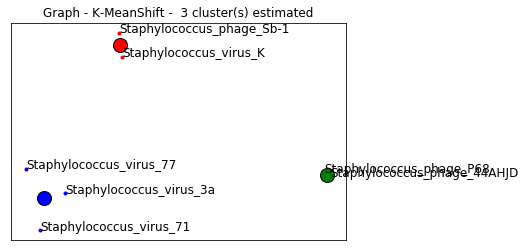

In [69]:
# ==================================================================
# Compute clustering with MeanShift
# ==================================================================

# define the quantile to use [0-1] and the samples
quantile_to_use = 0.5
samples = 200

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(coordinates, quantile=quantile_to_use, n_samples=samples)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

ms.fit(coordinates)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# ==================================================================
# Plot result
# ==================================================================
import matplotlib.pyplot as plt
from itertools import cycle

fig = plt.figure();
ax = fig.add_subplot(111);

plt.clf();

colors = cycle('bgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(coordinates[my_members, 0], coordinates[my_members, 1], col + '.');
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14);
plt.xticks([]);
plt.yticks([]);
plt.title("Graph - K-MeanShift -  %d cluster(s) estimated" % n_clusters_);

# ==================================================================
# display name of phages
# ==================================================================

for i, txt in enumerate(phage_designation):
    plt.annotate(txt, (coordinates[:, 0][i], coordinates[:, 1][i]), size = 12)

plt.show()

# Source : 
# 2018. A demo of the mean-shift clustering algorithm. 
# scikit-learn [en ligne]. 
# [Consulté le 27 Avril 2019]. Disponible à l'adresse : 
# https://scikit-learn.org/stable/auto_examples/cluster/plot_mean_shift.html#sphx-glr-auto-examples-cluster-plot-mean-shift-py

## K-Mean 2D

In [55]:
# define the number of clusters you want
clusters = 3
# define the number of initialisation 
initialisations = 10
# define iterations to find center
iterations = 100


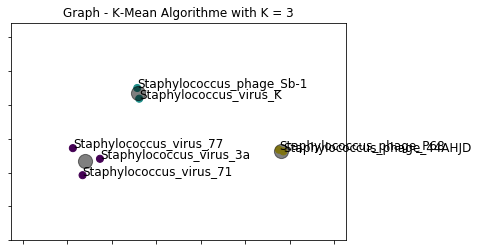

In [56]:
# =================================================================================================
# 2D Graph
# =================================================================================================

#n_cluster => number of clusters we want.
#n_init    => number of execution of the algorithm
#max_iter  => number of iteration to find the center
kmeans = KMeans(n_clusters=clusters, init='random', n_init=initialisations, max_iter=iterations)
kmeans.fit(coordinates)
y_kmeans = kmeans.predict(coordinates)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

#display phages' name
for i, txt in enumerate(phage_designation):
    plt.annotate(txt, (coordinates[i,0],coordinates[i,1]), size=12)

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("Graph - K-Mean Algorithme with K = 3")

plt.show()
# Source : 
# VANDERPLAS, Jake, N.D. In Depth: k-Means Clustering. 
# Python Data Science HandBook [en ligne]. 
# [Consulté le 10 Avril 2019]. Disponible à l'adresse : https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

## K-Mean 3D

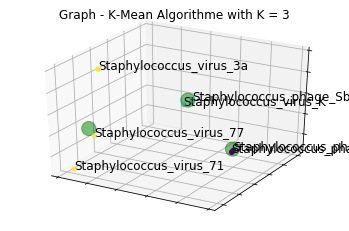

In [57]:
from mpl_toolkits.mplot3d import Axes3D  # for 3D graph

#we need a 3D representation -> we use PCA to reduce dimension
pca = PCA(n_components=3)
coordinates = pca.fit_transform(coordinates)
coordinates = np.array(coordinates)

#n_cluster => number of clusters we want.
#n_init    => number of execution of the algorithm
#max_iter  => number of iteration to find the center
kmeans = KMeans(n_clusters=clusters, init='random', n_init=initialisations, max_iter=iterations)
kmeans.fit(coordinates)
y_kmeans = kmeans.predict(coordinates)

fig = plt.figure();
ax = fig.add_subplot(111, projection='3d')
ax.scatter(coordinates[:, 0], coordinates[:, 1], coordinates[:, 2], c=y_kmeans, cmap='viridis')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='green', s=200, alpha=0.5)

#affiche les noms
for i, txt in enumerate(phage_designation):
    ax.text(coordinates[i,0],coordinates[i,1],coordinates[i,2],  phage_designation[i], size=12)

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])
ax.set_title("Graph - K-Mean Algorithme with K = 3");

## DBSCAN

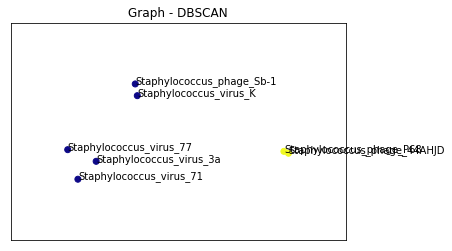

In [65]:
from sklearn.preprocessing import StandardScaler

# ==================================================================
# clustering
# ==================================================================

scaler = StandardScaler()
X_scaled = scaler.fit_transform(coordinates)
# cluster the data
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(coordinates[:, 0], coordinates[:, 1], c=clusters, cmap="plasma")
plt.xticks([])
plt.yticks([])
plt.title("Graph - DBSCAN")

# ==================================================================
# display phages'name
# ==================================================================
for i, txt in enumerate(phage_designation):
    plt.annotate(txt, (coordinates[i,0],coordinates[i,1]))

plt.show()

## T-SNE

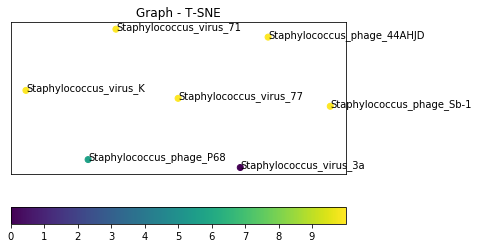

In [67]:
from sklearn.manifold import TSNE

# ==================================================================
# clustering
# ==================================================================

X = np.array(coordinates)

#reduce the matrix
coordinates_embedded = TSNE(n_components=2).fit_transform(coordinates)
y_data = coordinates_embedded[:,1]
plt.scatter(coordinates_embedded[:, 0], coordinates_embedded[:, 1], c=y_data)
plt.colorbar(orientation='horizontal', ticks=range(10))
plt.clim(0, 10)
plt.title("Graph - T-SNE")
plt.xticks([])
plt.yticks([])


# ==================================================================
# display phages'name
# ==================================================================
for i, txt in enumerate(phage_designation):
    plt.annotate(txt, (coordinates_embedded[i,0],coordinates_embedded[i,1]))
plt.show()